# Model Training

### scikit - learn

https://scikit-learn.org/stable/

scikitlearn (sklearn) provides simple and efficient tools for predictive data analysis. It is built on NumPy, SciPy, and matplotlib.

First thing, Import all the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', 50)

In [3]:
# next load the data
df = pd.read_csv('final.csv')
df.head()

,price,year_sold,property_tax,insurance,beds,baths,sqft,year_built,lot_size,basement,popular,recession,property_age,property_type_Bunglow,property_type_Condo
0,295850,2013,234,81,1,1,584,2013,0,0,0,1,0,0,1
1,216500,2006,169,51,1,1,612,1965,0,1,0,0,41,0,1
2,279900,2012,216,74,1,1,615,1963,0,0,0,1,49,0,1
3,379900,2005,265,92,1,1,618,2000,33541,0,0,0,5,0,1
4,340000,2002,88,30,1,1,634,1992,0,0,0,0,10,0,1


In [4]:
df.tail()

,price,year_sold,property_tax,insurance,beds,baths,sqft,year_built,lot_size,basement,popular,recession,property_age,property_type_Bunglow,property_type_Condo
1858,760000,2008,881,249,5,5,7842,2003,436035,1,0,0,5,1,0
1859,690000,2015,1553,473,5,6,6501,1956,23086,1,0,0,59,1,0
1860,600000,1999,942,287,5,6,7064,1995,217800,1,0,0,4,1,0
1861,759900,2009,803,245,5,6,7500,2006,8886,1,0,0,3,1,0
1862,735000,2015,1459,444,5,6,7515,1958,10497,1,0,0,57,1,0


In [5]:
df.shape

(1863, 15)

## Linear Regression Model

In [6]:
# import linear regression model
from sklearn.linear_model import LinearRegression

In [7]:
# seperate input features in x
x = df.drop('price', axis=1)

# store the target variable in y
y = df['price']

**Train Test Split**
* Training sets are used to fit and tune your models.
* Test sets are put aside as "unseen" data to evaluate your models.
* The `train_test_split()` function splits data into randomized subsets.

In [8]:
# import module
from sklearn.model_selection import train_test_split

In [12]:
x_train.property_type_Bunglow.value_counts()

property_type_Bunglow
1    849
0    641
Name: count, dtype: int64

In [10]:
# Split the dataset
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, stratify=x.property_type_Bunglow)

In [11]:
x_train.head()

,year_sold,property_tax,insurance,beds,baths,sqft,year_built,lot_size,basement,popular,recession,property_age,property_type_Bunglow,property_type_Condo
1236,2009,458,139,4,3,2033,1966,14374,1,0,0,43,1,0
1092,2009,556,169,4,2,2400,1969,13939,1,0,0,40,1,0
601,2003,471,143,3,2,1858,2003,2242,1,0,0,0,0,1
476,2004,278,84,3,2,1380,1997,0,1,0,0,7,0,1
459,2005,389,118,3,2,1340,1965,10497,1,0,0,40,1,0


In [13]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1490, 14), (1490,), (373, 14), (373,))

In [14]:
# train your model
model = LinearRegression()
lrmodel = model.fit(x_train, y_train)

In [15]:
lrmodel.coef_

array([ 7.34324823e+03, -4.61585572e+02,  2.34246240e+03,  6.31574528e+03,
        7.44698010e+03,  2.78189673e+01,  4.12513795e+03,  1.87541362e-01,
       -5.39701344e+03, -1.17719166e+04, -4.61802293e+04,  3.21811028e+03,
        1.04736850e+04, -1.04736850e+04])

In [16]:
lrmodel.intercept_

-22774052.232095957

In [17]:
x_train.head(1)

,year_sold,property_tax,insurance,beds,baths,sqft,year_built,lot_size,basement,popular,recession,property_age,property_type_Bunglow,property_type_Condo
1236,2009,458,139,4,3,2033,1966,14374,1,0,0,43,1,0


In [18]:
# make preditions on train set
train_pred = lrmodel.predict(x_train)

In [19]:
train_pred

array([453061.76403569, 483502.33348579, 384769.20746808, ...,
       450036.33484415, 286686.20074155, 501451.74620804])

In [20]:
# evaluate your model
# we need mean absolute error
from sklearn.metrics import mean_absolute_error

train_mae = mean_absolute_error(train_pred, y_train)
print('Train error is', train_mae)

Train error is 86679.7727921813


In [21]:
lrmodel.coef_

array([ 7.34324823e+03, -4.61585572e+02,  2.34246240e+03,  6.31574528e+03,
        7.44698010e+03,  2.78189673e+01,  4.12513795e+03,  1.87541362e-01,
       -5.39701344e+03, -1.17719166e+04, -4.61802293e+04,  3.21811028e+03,
        1.04736850e+04, -1.04736850e+04])

In [22]:
lrmodel.intercept_

-22774052.232095957

In [23]:
# make predictions om test set
ypred = lrmodel.predict(x_test)

#evaluate the model
test_mae = mean_absolute_error(ypred, y_test)
print('Test error is', test_mae)

Test error is 86665.2392436503


### Our model is still not good beacuse we need a model with Mean Absolute Error < $70,000

Note - We have not scaled the features and not tuned the model.

## Decision Tree Model

In [24]:
# import decision tree model
from sklearn.tree import DecisionTreeRegressor

In [25]:
# create an instance of the class
dt = DecisionTreeRegressor(max_depth=3, max_features=10, random_state=567)

In [26]:
# train the model
dtmodel = dt.fit(x_train,y_train)

In [27]:
# make predictions using the test set
ytrain_pred = dtmodel.predict(x_train)

# evaluate the model
train_mae = mean_absolute_error(ytrain_pred, y_train)
train_mae

61186.86692028402

In [28]:
# make predictions using the test set
ytest_pred = dtmodel.predict(x_test)

In [29]:
# evaluate the model
test_mae = mean_absolute_error(ytest_pred, y_test)
test_mae

61324.42027749216

## How do I know if my model is Overfitting or Generalised?

In [30]:
# make predictions on train set
ytrain_pred = dtmodel.predict(x_train)

In [31]:
# import mean absolute error metric
from sklearn.metrics import mean_absolute_error

# evaluate the model
train_mae = mean_absolute_error(ytrain_pred, y_train)
train_mae

61186.86692028402

## Plot the tree

In [32]:
# get the features
dtmodel.feature_names_in_

array(['year_sold', 'property_tax', 'insurance', 'beds', 'baths', 'sqft',
       'year_built', 'lot_size', 'basement', 'popular', 'recession',
       'property_age', 'property_type_Bunglow', 'property_type_Condo'],
      dtype=object)

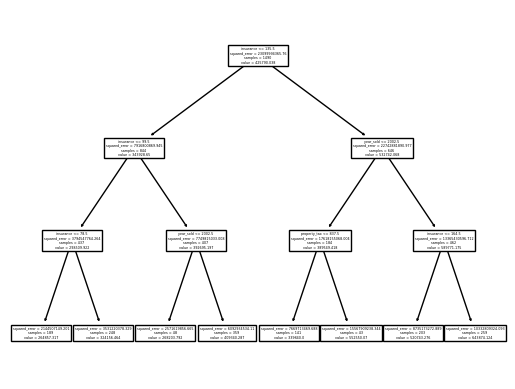

In [33]:
# plot the tree
from sklearn import tree

# Plot the tree with feature names
tree.plot_tree(dtmodel, feature_names=dtmodel.feature_names_in_)

#tree.plot_tree(dtmodel)
#plt.show(dpi=300)

# Save the plot to a file
plt.savefig('tree.png', dpi=300)

## Random Forest Model

In [34]:
# import decision tree model
from sklearn.ensemble import RandomForestRegressor

In [35]:
# create an instance of the model
rf = RandomForestRegressor(n_estimators=200, criterion='absolute_error')

In [36]:
# train the model
rfmodel = rf.fit(x_train,y_train)

In [37]:
# make prediction on train set
ytrain_pred = rfmodel.predict(x_train)

In [38]:
# make predictions on the x_test values
ytest_pred = rfmodel.predict(x_test)

In [39]:
# evaluate the model
test_mae = mean_absolute_error(ytest_pred, y_test)
test_mae

41628.31512064343

In [40]:
# Individual Decision Trees
# tree.plot_tree(rfmodel.estimators_[2], feature_names=dtmodel.feature_names_in_)

## Pickle:

* The pickle module implements a powerful algorithm for serializing and de-serializing a Python object structure.

* The saving of data is called Serialization, and loading the data is called De-serialization.

**Pickle** model provides the following functions:
* **`pickle.dump`** to serialize an object hierarchy, you simply use `dump()`.
* **`pickle.load`** to deserialize a data stream, you call the `loads()` function.

In [44]:
# import pickle to save model
import pickle

# Save the trained model on the drive
pickle.dump(dtmodel, open('RE_Model.pkl','wb'))

In [47]:
# Load the pickled model
RE_Model = pickle.load(open('RE_Model.pkl','rb'))

In [48]:
print(type(RE_Model))


<class 'sklearn.tree._classes.DecisionTreeRegressor'>


In [50]:
RE_Model.predict([[2012, 216, 74, 1 , 1, 618, 2000, 600, 1, 0, 0, 6, 0,1]])

c:\Users\Arasu\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([264857.31746032])

In [49]:
x_test.head(1)

,year_sold,property_tax,insurance,beds,baths,sqft,year_built,lot_size,basement,popular,recession,property_age,property_type_Bunglow,property_type_Condo
1085,2011,520,158,4,2,2300,1970,15245,1,0,1,41,1,0
